## -------------------------------- *Udemy_Course (Online Course Business)* --------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------

# (1-2) Definition, Problems, and Goals

------------------------------------------------------------------------------------------------------------------------------------------------------

### Definition

Machine Learning ini merupakan salah satu model untuk menentukan sukses tidak nya suatu course yang akan dibuka oleh suatu Lembaga Pendidikan atau dalam problem ini ialah MOOC, yang dapat digunakan oleh perusahaan atau lembaga tersebut sebagai bahan pertimbangan dalam me-*release* course baru.

### Problems & Goals

2.1 Problems
- Kualitas Pendidikan Menurun saat diterapkannya Sistem Pendidikan Jarak Jauh berbasis Teknologi (mediaindonesia.com)
- Penurunan partisipan pada Lembaga-lembaga Bimbingan Belajar akibat Covid-19 (sonora.id)
- Kesulitan dalam mencari pekerjaan akibat pandemi covid (kompasiana.com)
- Kesulitan untuk mengetahui course apa yang paling dibutuhkan mereka-mereka yang sedang ingin improving skill (Briyando, Boby.2020)

2.2 Goals
- Membuat model yang dapat memprediksi/mendeteksi sukses tidaknya suatu course yang akan dibuka oleh suatu MOOC dalam mendapatkan subscribers atau partisipan
- Mengetahui variabel apa saja yang dapat mempengaruhi sukses/tidaknya suatu course dalam mendapatkan subscribers atau partisipan

2.3 Limitasi
- Model dapat digunakan oleh seluruh perusahaan berbasis Platform Media Pembelajaran Online / MOOC / Bimbel dan perusahaan sejenis lainnya.
- Model hanya dapat memprediksi persentase sukses atau tidaknya course yang akan dibuka.


# Import Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999
pd.set_option('display.max_colwidth', -1)

%matplotlib inline

------------------------------------------------------------------------------------------------------------------------------------------------------

# (3) Import Data

------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
df = pd.read_csv('udemy.csv', parse_dates=['published_timestamp'])
df1 = df.copy()
df1['content_duration'] = round(df1['content_duration'],2)

In [3]:
df1.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-banking-course/,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow Your CA Practice,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and Consultants,https://www.udemy.com/financial-modeling-for-business-analysts-and-consultants/,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel 2017,https://www.udemy.com/complete-excel-finance-course-from-beginner-to-pro/,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-profits-trading-options/,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


------------------------------------------------------------------------------------------------------------------------------------------------------

# (4) Cek Missing Value

------------------------------------------------------------------------------------------------------------------------------------------------------

In [4]:
df1.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

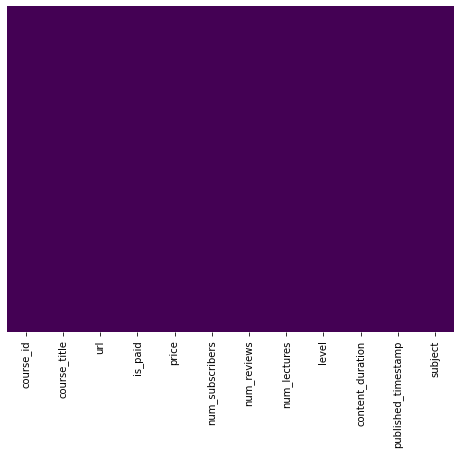

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.isna(), cmap='viridis', yticklabels=False, cbar=False)
plt.show()

- **Tidak terdapat null, sehingga Handling Missing Value tidak perlu dilakukan**

------------------------------------------------------------------------------------------------------------------------------------------------------

# (5) Describe Data

------------------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [7]:
df1.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

### Variabel

- course_id: ID setiap jenis course
- course_title: Nama Course
- url: url dari course_title
- is paid: Tipe Course (Gratis / Berbayar)
- price: Harga course (dalam satuan USD)
- num_subscriber: Jumlah subscriber atau student
- num_reviews: Jumlah subscriber atau partisipan yang memberikan review
- num_lectures: Jumlah instruktur
- level: Level course 
- content_duration: Durasi konten dari satu course nya (dalam satuan hours)
- published_timestamp: Keterangan waktu perilisan course
- subject: Kategori course

Berdasarkan kolom-kolom di atas, belum terdapatnya kolom target (sukses/tidak). Oleh karena itu, kolom target Sukses/Tidak Sukses akan di buat di tahap Feature Engineering berdasarkan Jumlah Subscriber. 

In [8]:
df1.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [9]:
df1.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [10]:
tab_desc1 = df1.describe().T
tab_desc1

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094527,6.053835,0.0,1.0,2.0,4.50,78.5


In [11]:
z = [1,2,3,4,5,6,7,8,8]
np.quantile(z, 0.25)

3.0

In [12]:
tab_desc2 = df1.describe(include='O').T
tab_desc2

,count,unique,top,freq
course_title,3678,3663,Creating an animated greeting card via Google Slides,3
url,3678,3672,https://www.udemy.com/cfa-level-2-quantitative-methods/,2
level,3678,4,All Levels,1929
subject,3678,4,Web Development,1200


In [13]:
dfDesc = []
for i in df1.columns:
    dfDesc.append([
        i,
        df1[i].dtypes,
        df1[i].isna().sum(),
        round((df1[i].isna().sum()/len(df1)*100),2),
        df1[i].nunique(),
        df1[i].drop_duplicates().sample(2).values
    ])

In [14]:
tab_desc3 = pd.DataFrame(dfDesc, columns=['Feature','dtypes','null','null%','nunique','sample'])
tab_desc3

,Feature,dtypes,null,null%,nunique,sample
0,course_id,int64,0,0.0,3672,"[420926, 179978]"
1,course_title,object,0,0.0,3663,"[How to start a successful career in finance?, Master ASP . NET 4 from scratch]"
2,url,object,0,0.0,3672,"[https://www.udemy.com/how-to-create-your-own-steampunk-vehicle-part-1/, https://www.udemy.com/how-to-learn-ruby-on-rails/]"
3,is_paid,bool,0,0.0,2,"[True, False]"
4,price,int64,0,0.0,38,"[70, 60]"
5,num_subscribers,int64,0,0.0,2197,"[1284, 12458]"
6,num_reviews,int64,0,0.0,511,"[1236, 17]"
7,num_lectures,int64,0,0.0,229,"[68, 15]"
8,level,object,0,0.0,4,"[Expert Level, All Levels]"
9,content_duration,float64,0,0.0,105,"[0.53, 46.5]"


- Course ID dan Course title tidak sama jumlah nunique nya. Kemungkinan ada satu course title memiliki lebih dari 1 course_id
- Selain itu, jumlah data ialah 3678, sedangkan course_id dan url hanya 3672. **Ada sejumlah data memiliki course_id yang sama (terduplikasi)**

In [15]:
df1.course_title.value_counts().head()

Creating an animated greeting card via Google Slides            3
Acoustic Blues Guitar Lessons                                   3
Understanding Financial Statements                              2
How to Make a Wordpress Website 2017                            2
The Complete Web Developer Masterclass: Beginner To Advanced    2
Name: course_title, dtype: int64

In [16]:
df1[df1.course_title=='Creating an animated greeting card via Google Slides']

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1301,692920,Creating an animated greeting card via Google Slides,https://www.udemy.com/creating-an-animated-greeting-card-via-google-slides/,True,20,1504,10,9,Beginner Level,1.5,2016-01-05 20:31:49+00:00,Graphic Design
1334,699376,Creating an animated greeting card via Google Slides,https://www.udemy.com/creating-an-animated-greeting-card-via-google-slides-2/,True,20,549,10,8,Beginner Level,1.0,2016-04-12 01:24:14+00:00,Graphic Design
1447,699380,Creating an animated greeting card via Google Slides,https://www.udemy.com/creating-an-animated-greeting-card-via-google-slides-3/,True,20,770,8,8,Intermediate Level,1.0,2016-05-06 15:54:32+00:00,Graphic Design


In [17]:
id_duplikat = df1.course_id.value_counts().head(6).index # kenapa cuman sampai 6, karena value counts berikutnya cuman 1 setiap course id
index_loc = []
for i in id_duplikat:
    index_loc.append([
        i,
        df1.index[df1.course_id==i]
    ])

In [18]:
tab_desc4 = pd.DataFrame(index_loc, columns=['course_id', 'loc_index'])
tab_desc4

,course_id,loc_index
0,185526,"Int64Index([1234, 1473], dtype='int64')"
1,1084454,"Int64Index([463, 1100], dtype='int64')"
2,837322,"Int64Index([453, 787], dtype='int64')"
3,28295,"Int64Index([2478, 2561], dtype='int64')"
4,1035638,"Int64Index([778, 894], dtype='int64')"
5,1157298,"Int64Index([454, 788], dtype='int64')"


- Setiap course yang sama tersebut akan didrop salah satunya

In [19]:
tab_desc5 = df1[(df1.course_id==185526) | (df1.course_id==1084454)]
tab_desc5

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
463,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative-methods/,True,40,0,0,35,All Levels,5.50,2017-07-02 14:29:35+00:00,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative-methods/,True,40,0,0,35,All Levels,5.50,2017-07-02 14:29:35+00:00,Business Finance
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.62,2014-04-15 21:48:55+00:00,Graphic Design
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.62,2014-04-15 21:48:55+00:00,Graphic Design


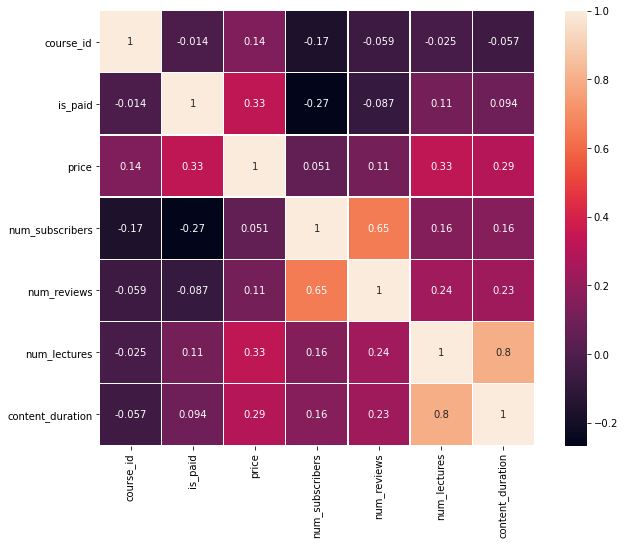

In [20]:
plt.figure(figsize=(11, 8))

sns_plot = sns.heatmap(df1.corr(), annot=True, square=True, linewidths=0.25)
# plt.savefig('heatmap.png')
plt.show()

- Hipotesis awal variabel yang berhubungan dengan **Jumlah Subscribers** berdasarkan nilai korelasi tertinggi

1. Jumlah Reviews
2. Paid or not
3. Content duration
4. Jumlah Lectures

------------------------------------------------------------------------------------------------------------------------------------------------------

# (6) EDA without Handling Missing Value

------------------------------------------------------------------------------------------------------------------------------------------------------

## a. Analisa 1 variabel (Persebaran Data)

##### a1. Subscribers

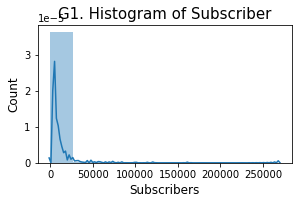

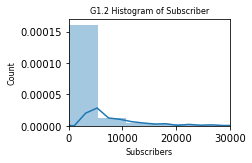

In [21]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
sns.distplot(df1.num_subscribers, bins=10)
plt.title('G1. Histogram of Subscriber', fontsize=15)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Subscribers', fontsize=12)
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
plt.show()

plt.subplot(2,2,2)
sns.distplot(df1.num_subscribers, bins=50)
plt.title('G1.2 Histogram of Subscriber', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.xlabel('Subscribers', fontsize=8)
plt.xlim(0,30000)
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
plt.show()

- Histogram digunakan untuk melihat dispersi atau frekuensi data
- Berdasarkan Grafik G1, bentuk histogram jumlah subscriber merupakan skewness positif. Skewness yang bernilai positif berarti ekor distribusi berada di sebelah kanan nilai terbanyak. Sebagian besar distribusi berada di nilai rendah. Artinya, kemungkinan Jumlah persebaran data subscriber sebagian besar pada jumlah 0 sampai ± 6000

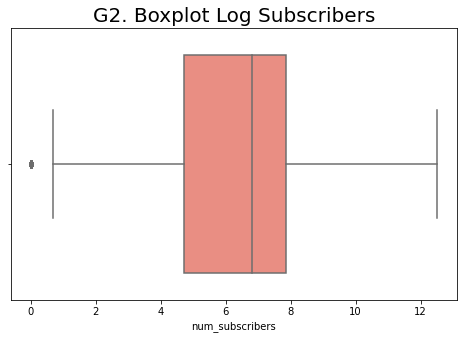

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(np.log(df1.num_subscribers), color='salmon')
plt.title('G2. Boxplot Log Subscribers', fontsize=20)
plt.savefig('G2.png')
plt.show()

- Fungsi boxplot ialah untuk melihat kesimetrisan dan derajat penyebaran data, simetris median di tengah2 dan whisker sama panjang

- Grafik G2 menunjukan bahwa **Persebaran Data Subscriber tidak simetris, dan data berada pada rentang jumlah subscriber yang kecil**

In [23]:
uf_subs = (1.5*(df1.num_subscribers.quantile(0.75)-df1.num_subscribers.quantile(0.25))) + df1.num_subscribers.quantile(0.75)
b=df1.num_subscribers[df1.num_subscribers<=uf_subs]

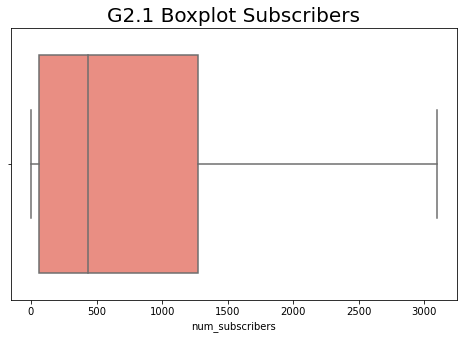

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.num_subscribers[df1.num_subscribers<=3100], color='salmon')
plt.title('G2.1 Boxplot Subscribers', fontsize=20)
plt.show()

- Sebagian besar persebaran data yang dimaksud Grafik G2 ditunjukan pada grafik ini, yaitu hanya pada rentang jumlah subscriber 0 sampai 3102

In [25]:
a = df1.num_subscribers.value_counts().head(10)
tab_eda1 = pd.DataFrame(a)

In [26]:
tab_eda1['Num_Sub'] = tab_eda1.index
index = np.arange(1,11)
tab_eda1['index'] = index
tab_eda1.rename(columns={"num_subscribers":"Jumlah Data"}, inplace=True)

In [27]:
newcol = ['Num_Sub','Jumlah Data','index']
tab_eda1 = tab_eda1[newcol]
tab_eda1 = tab_eda1.set_index(index)
tab_eda1.drop(columns='index',inplace=True)
tab_eda1

,Num_Sub,Jumlah Data
1,0,70
2,1,49
3,5,28
4,2,27
5,4,26
6,3,26
7,7,24
8,11,23
9,13,19
10,6,18


- Tabel tab_eda1 di atas merupakan **jumlah 10 data course tertinggi** dari **setiap number subscribers**
- Contoh pembacaan : Ada sejumlah 70 course yang memiliki subscriber 0

In [28]:
feature_num = df1[['num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'price', 'subject', 'level']]
for i in feature_num:
    if feature_num[i].dtype in ['object','bool']:
        pass
    elif i == 'price':
        pass
    else:
        feature_num[i +'_log'] = np.log(feature_num[i] + 1)
log_feature = [f for f in feature_num.columns if '_log' in f]

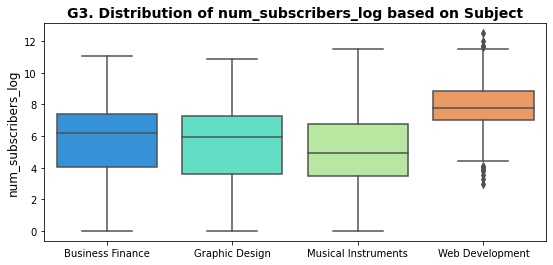

In [29]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(x='subject', y='num_subscribers_log', data=feature_num, palette='rainbow')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('num_subscribers_log', fontsize=12)
ax.set_title('G3. Distribution of num_subscribers_log based on Subject', fontsize=14, weight='bold')
plt.show()

- Berdasarkan grafik G3, **Web Development** adalah course yang memiliki frekuensi subscriber tinggi2, disusul Business Finance, Graphic Design, dan Musical Instruments.
- Masing-masing subject memiliki data yang tidak simetris

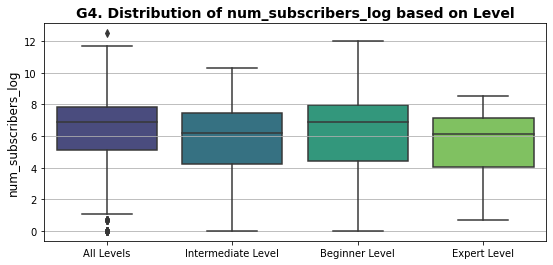

In [30]:
plt.figure(figsize=(9,4))
plt.grid()
ax = sns.boxplot(x='level', y='num_subscribers_log', data=feature_num, palette='viridis')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('num_subscribers_log', fontsize=12)
ax.set_title('G4. Distribution of num_subscribers_log based on Level', fontsize=14, weight='bold')
plt.show()

- Persebaran subscribers di masing2 subject tidak simetris
- Expert level memiliki frekuensi subscribers rendah dibanding 3 level lain
- Subscribers2 tinggi berada pada All Levels dan Beginner Level

In [31]:
df1.level[df1.num_subscribers>=30000].value_counts()

All Levels        38
Beginner Level    14
Name: level, dtype: int64

##### a2. Num_reviews

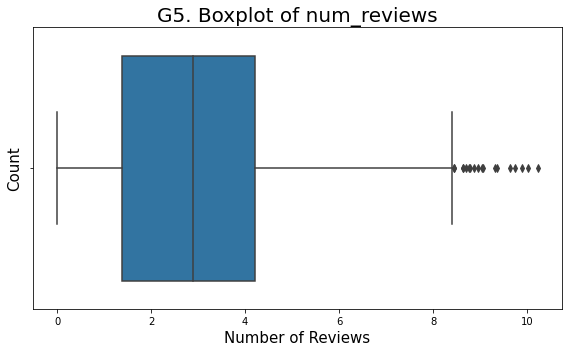

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(np.log(df1.num_reviews))
plt.title('G5. Boxplot of num_reviews', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Number of Reviews', fontsize=15)  
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
plt.show()

- Sebagian besar data berdasarkan grafik G5, frekuensi angka review rendah dan tidak simetris

In [33]:
uf_review = (1.5*(df1.num_reviews.quantile(0.75)-df1.num_reviews.quantile(0.25))) + df1.num_reviews.quantile(0.75)
df1.num_reviews[df1.num_reviews>uf_review].count()

494

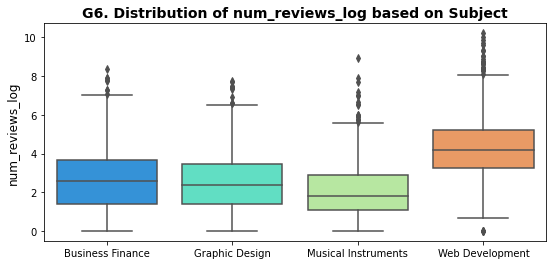

In [34]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(x='subject', y='num_reviews_log', data=feature_num, palette='rainbow')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('num_reviews_log', fontsize=12)
ax.set_title('G6. Distribution of num_reviews_log based on Subject', fontsize=14, weight='bold')
plt.show()

- Subject web development ialah salah satu subject yang rata2 memiliki frekuensi review yang banyak di bandingkan 3 lainnya. Ini dapat berarti bahwa subject Development yang paling banyak disukai, karena melihat frekuensi subscribers pada grafik G3 itu tinggi. 
- Web Development memiliki data jumlah review yang cukup simetris. Berbeda dengan 3 lainnya yang tidak simetris.

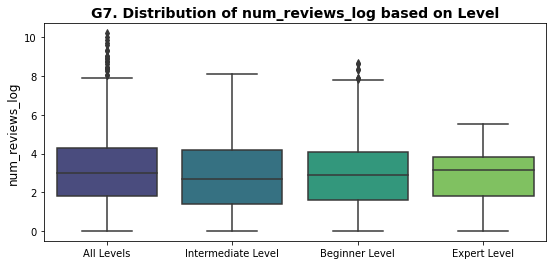

In [35]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(x='level', y='num_reviews_log', data=feature_num, palette='viridis')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('num_reviews_log', fontsize=12)
ax.set_title('G7. Distribution of num_reviews_log based on Level', fontsize=14, weight='bold')
plt.show()

- Expert level merupakan level course yang memiliki frekuensi jumlah review yang rendah

##### a3. Num_lectures

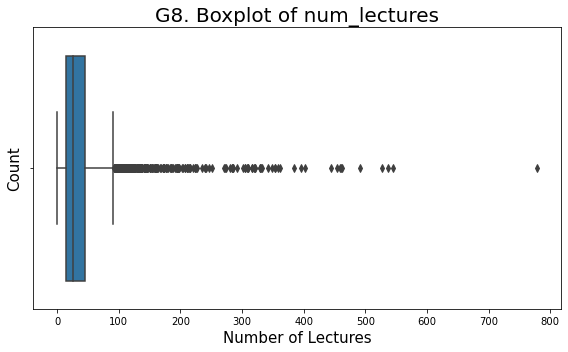

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.num_lectures)
plt.title('G8. Boxplot of num_lectures', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Number of Lectures', fontsize=15)  
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
plt.show()

- Persebaran Jumlah lecture tidak simetris. Sebagan besar course memiliki lecture di rentang 1-50

In [37]:
df1.num_subscribers[df1.num_lectures>100].median()

1949.0

In [38]:
uf_lecture = (1.5*(df1.num_lectures.quantile(0.75)-df1.num_lectures.quantile(0.25))) + df1.num_lectures.quantile(0.75)
df1.num_lectures[df1.num_lectures>uf_lecture].count()

293

##### a4. price

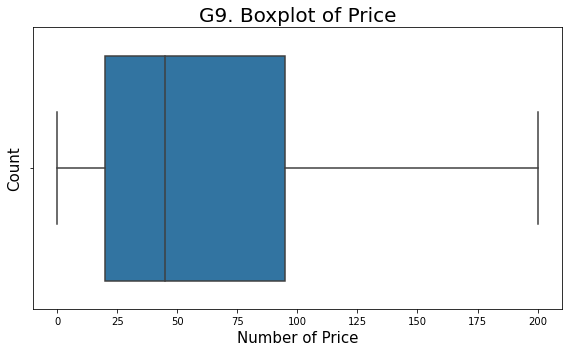

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.price)
plt.title('G9. Boxplot of Price', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Number of Price', fontsize=15)  
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
plt.show()

- Sebagian besar course banyak yang berharga rendah

In [40]:
uf_price = (1.5*(df1.price.quantile(0.75)-df1.price.quantile(0.25))) + df1.price.quantile(0.75)
df1.price[df1.price>uf_price].count()

0

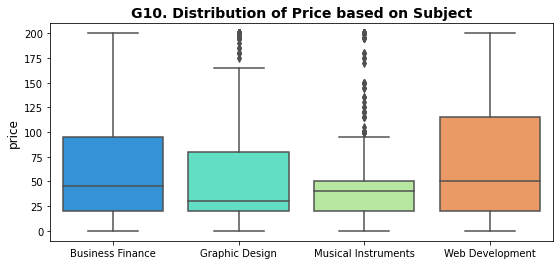

In [41]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(x='subject', y='price', data=feature_num, palette='rainbow')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('price', fontsize=12)
ax.set_title('G10. Distribution of Price based on Subject', fontsize=14, weight='bold')
plt.show()

- Sebagian besar course yang memiliki harga tinggi ialah course dengan Subject Web Development dan Business Finance
- Subject yang paling banyak berharga rendah ialah Musical Instrumen

In [42]:
publish_dt = df1['published_timestamp'].dt

In [43]:
df1['year_p'] = publish_dt.year
df1['month_p'] = publish_dt.month
df1['date_p'] = publish_dt.day

In [44]:
df1.drop(columns=['published_timestamp'], inplace=True)

In [45]:
df1.year_p[df1.subject=='Musical Instruments'].value_counts()

2016    228
2015    171
2014    120
2017    112
2013    39 
2012    10 
Name: year_p, dtype: int64

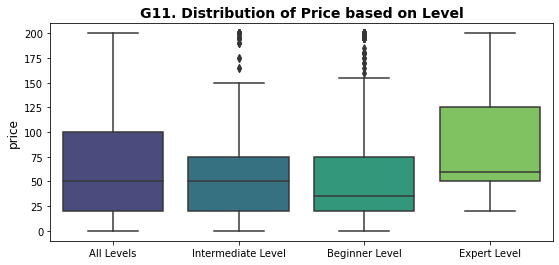

In [46]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(x='level', y='price', data=feature_num, palette='viridis')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('price', fontsize=12)
ax.set_title('G11. Distribution of Price based on Level', fontsize=14, weight='bold')
plt.show()

- Course dengan level Expert merupakan course yang mendominasi harga tinggi

In [47]:
df1.price[df1.level=='All Levels'].mean()

73.02229134266459

##### a5. Content Duration

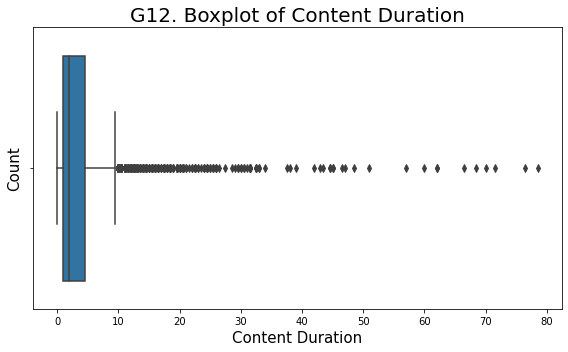

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.content_duration)
plt.title('G12. Boxplot of Content Duration', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Content Duration', fontsize=15)  
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
plt.show()

- Sebagian besar course memiliki durasi konten singkat (rata-rata 4-5 h)

In [49]:
uf_duration = (1.5*(df1.content_duration.quantile(0.75)-df1.content_duration.quantile(0.25))) + df1.content_duration.quantile(0.75)
df1.content_duration[df1.content_duration>uf_duration].count()

313

## b. Analisa 2 variabel

##### b1. Subscribers vs Review

In [50]:
tab_eda2 = df1[['num_reviews','num_subscribers']][(df1.num_subscribers>0) & (df1.num_reviews>0)].sort_values(by='num_reviews')

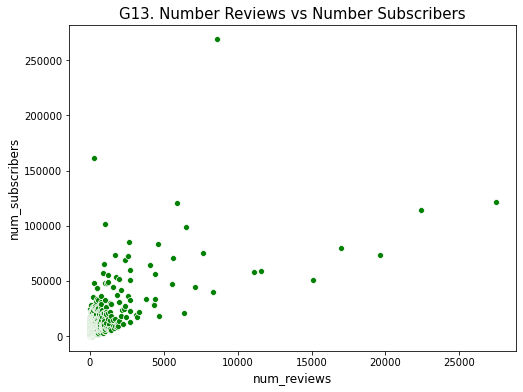

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='num_reviews', y='num_subscribers', data=tab_eda2, color='g')
plt.title('G13. Number Reviews vs Number Subscribers', fontsize=15)
plt.xlabel('num_reviews', fontsize=12)
plt.ylabel('num_subscribers', fontsize=12)
plt.show()

- Secara umum memang berdasarkan grafik G7, **semakin banyak reviewers, subscriber semakin besar.**

In [52]:
df1[df1.num_subscribers>=260000]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,year_p,month_p,date_p
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-from-scratch/,False,0,268923,8629,45,All Levels,10.5,Web Development,2013,2,14


- data pada subscribers max adalah webdev, yang merupakan subject dengan frekuensi subscribers tinggi. Dan yang membuat nya bisa mendapatkan subscribers outliers ialah karena harga nya yang gratis

##### b2. Subscribers vs is_paid

In [53]:
df1.is_paid.value_counts()

True     3368
False    310 
Name: is_paid, dtype: int64

- Dikarenakan jumlah subscriber memiliki outliers dan jumlah data antara tipe berbayar dengan gratis tidak balance, maka dalam analisis Subscribers vs is_paid akan digunakan nilai median per tipe lisensi nya

In [54]:
tab_eda3 = pd.DataFrame(
    index=['is_paid_True', 'is_paid_False'],
    columns = ['Median'],
    data = [df1.num_subscribers[df1.is_paid==True].quantile(.5), df1.num_subscribers[df1.is_paid==False].quantile(0.5)]
)
tab_eda3

,Median
is_paid_True,734.5
is_paid_False,4869.5


In [55]:
df1.is_paid.unique().tolist()

[True, False]

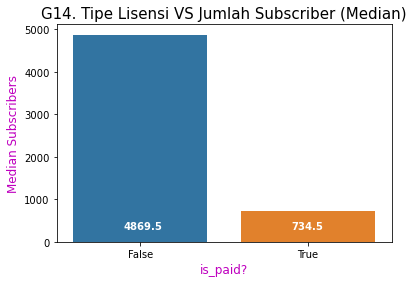

In [56]:
sns.barplot(x=df1.is_paid.unique().tolist(), y=[tab_eda3.iloc[0]['Median'],tab_eda3.iloc[1]['Median']])
plt.title('G14. Tipe Lisensi VS Jumlah Subscriber (Median)', fontsize=15)
plt.ylabel('Median Subscribers', color ='m', fontsize=12)
plt.xlabel('is_paid?', color='m', fontsize=12)  
plt.tick_params(labelsize=10)
plt.xticks(rotation=360)
plt.text(0-0.1, 300, tab_eda3.iloc[1]['Median'], fontweight='bold', color='white')
plt.text(1-0.1, 300, tab_eda3.iloc[0]['Median'], fontweight='bold', color='white')
plt.savefig('G14.png')
plt.show()

- **Terlihat berdasarkan grafik G14 dan jumlah data per tipe lisensi, walaupun jumlah data pada lisensi berbayar lebih banyak, Tipe lisensi Gratis memiliki nilai median subscribers lebih banyak. Artinya sebagian besar data pada lisensi gratis memiliki subscriber tinggi-tinggi**. Lisensi berbayar ini memiliki berbagai macam variasi price. Oleh karena itu perlu dilihat lebih lanjut lagi apakah harga memiliki pengaruh juga terhadap Jumlah subscribers nya dengan memecah data lisensi berbayar.

##### b3. Subscribers Vs Price

In [57]:
tab_eda4 = pd.crosstab(index=df1.price, columns='Median Subscribers', values=df1.num_subscribers, aggfunc='median').sort_values(by='Median Subscribers', ascending=True)
tab_eda4.tail()

col_0,Median Subscribers
price,
160,2326.0
0,4869.5
110,4935.5
190,5707.0
155,6178.0


- Berdasarkan tab_eda4 di atas, dapat dikatakan median subscribers disetiap kenaikan harga cenderung mengalami kenaikan

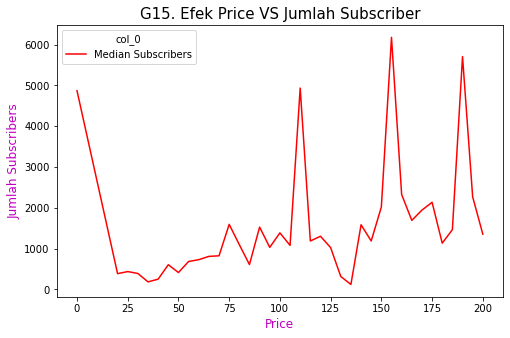

In [58]:
(pd.crosstab(index=df1.price, columns='Median Subscribers', values=df1.num_subscribers, aggfunc='median')).plot(
    figsize=(8,5), 
    kind='line',
    color = 'r'
)
plt.title('G15. Efek Price VS Jumlah Subscriber', fontsize=15)
plt.ylabel('Jumlah Subscribers', color ='m', fontsize=12)
plt.xlabel('Price', color='m', fontsize=12)  
plt.tick_params(labelsize=10)
plt.xticks(rotation=360)
plt.savefig('G15.png')
plt.show()

- Berdasarkan **grafik G15**, **terjadi penurunan saat course menjadi lisensi berbayar**, ini merupakan hal yang wajar, karena ketika course berubah lisensi dari gratis menjadi berbayar akan ada kualitas yang dipertaruhkan. Akan tetapi berdasarkan **grafik G15**, dapat dilihat bahwa **median subscriber dari mulai harga 25 USD hingga 200 USD cenderung mengalami kenaikan, dan terdapat beberapa titik harga yang dapat mencapai subscribers maksimal**. Oleh karena itu, ketika membuat konten dengan lisensi berbayar, perlu dicari lebih lanjut mengenai range harga yang tepat agar tetep bisa mendapatkan jumlah subscriber optimal**

In [59]:
df1.subject[df1.price==50].value_counts()

Business Finance       163
Musical Instruments    143
Web Development        121
Graphic Design         41 
Name: subject, dtype: int64

In [60]:
df1[df1.price>=180].sort_values(by='num_reviews', ascending=False).head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,year_p,month_p,date_p
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,Web Development,2015,11,2
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-developer-course-2/,True,200,114512,22412,304,All Levels,30.5,Web Development,2016,3,8
3204,756150,Angular 4 (formerly Angular 2) - The Complete Guide,https://www.udemy.com/the-complete-guide-to-angular-2/,True,190,73783,19649,329,All Levels,22.0,Web Development,2016,2,11


In [61]:
df1.year_p[df1.price>=180].value_counts()

2016    152
2015    126
2017    125
2014    37 
2013    13 
2012    2  
Name: year_p, dtype: int64

- Mengapa bisa di harga 200 subscribers malah bertambah atau trend naik? karena rata2 subject pada harga tersebut ialah webdev dan bisnis finance

- Memang kenapa dengan 2 subject tersebut?
1. 2 subject tersebut merupakan subject yg paling banyak diminati
2. Kebanyakan tahun rilis dari subject2 pada harga tersebut ialah pada tahun 2015,2016, dan 2017. Dimulai tahun 2015, perkembangan teknologi mulai mengenal AI dan Big Data. (https://www.merdeka.com/)

- Oleh karena itulah hal ini dapat terjadi

- Disini saya coba membuat 3 kategori price, untuk melihat range harga berapa yang dapat mencapai subscribers maksimal

In [62]:
tab_eda5 = df1[['num_subscribers','num_lectures','price','subject','level']][df1.price>0]

In [63]:
tab_eda5['price_bin'] = pd.qcut(tab_eda5.price, 3, labels=['Murah', 'Terjangkau' ,'Mahal'])
tab_eda5.head(10)

,num_subscribers,num_lectures,price,subject,level,price_bin
0,2147,51,200,Business Finance,All Levels,Mahal
1,2792,274,75,Business Finance,All Levels,Terjangkau
2,2174,51,45,Business Finance,Intermediate Level,Terjangkau
3,2451,36,95,Business Finance,All Levels,Mahal
4,1276,26,200,Business Finance,Intermediate Level,Mahal
5,9221,25,150,Business Finance,All Levels,Mahal
6,1540,26,65,Business Finance,Beginner Level,Terjangkau
7,2917,23,95,Business Finance,All Levels,Mahal
8,5172,38,195,Business Finance,Expert Level,Mahal
9,827,15,200,Business Finance,All Levels,Mahal


- Binning digunakan dengan menggunakan qcut agar dapat membagi secara merata jumlah data berdasarkan nilai quantile nya. Sehingga penarikan kesimpulan akan lebih akurat

In [64]:
tab_eda6 = pd.crosstab(index='Jumlah Data', columns=tab_eda5.price_bin, values=tab_eda5.num_subscribers, aggfunc='count')
tab_eda6

price_bin,Murah,Terjangkau,Mahal
row_0,,,
Jumlah Data,1150,1131,1087


In [65]:
tab_eda61 = pd.crosstab(index='Jumlah Subscribers', columns=tab_eda5.price_bin, values=tab_eda5.num_subscribers, aggfunc='sum')
tab_eda61

price_bin,Murah,Terjangkau,Mahal
row_0,,,
Jumlah Subscribers,1778233,1855861,4549501


In [66]:
out = pd.qcut(tab_eda5.price,3)
out.unique()

[(75.0, 200.0], (30.0, 75.0], (19.999, 30.0]]
Categories (3, interval[float64]): [(19.999, 30.0] < (30.0, 75.0] < (75.0, 200.0]]

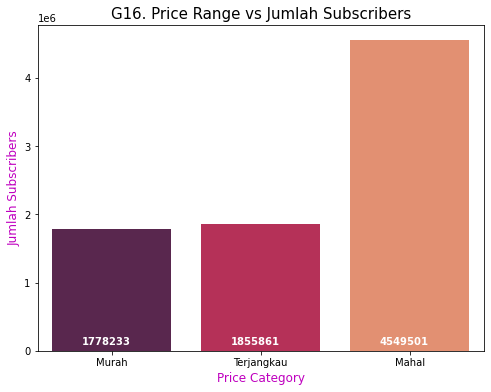

In [67]:
plt.figure(figsize=(8,6))
sns.barplot(x=tab_eda61.columns, y=tab_eda61.iloc[0], palette='rocket')
plt.xlabel('Price Category', c='m', fontsize=12)
plt.ylabel('Jumlah Subscribers', c='m', fontsize=12)
for i in range(0,3):
    plt.text(i-0.2, 100000, tab_eda61.iloc[0][i], fontweight='bold', color='white')
plt.title('G16. Price Range vs Jumlah Subscribers', fontsize=15)
plt.show()

- Berdasarkan hasil binning, ternyata **range Kategori harga Mahal (75-200 USD)** yang mendapatkan jumlah subscribers **maksimal**

In [68]:
tab_eda5.subject[tab_eda5.price_bin=='Mahal'].value_counts()

Web Development        466
Business Finance       365
Graphic Design         155
Musical Instruments    101
Name: subject, dtype: int64

In [69]:
tab_eda5.subject[tab_eda5.price_bin=='Terjangkau'].value_counts()

Web Development        336
Musical Instruments    333
Business Finance       332
Graphic Design         130
Name: subject, dtype: int64

In [70]:
tab_eda5.subject[tab_eda5.price_bin=='Murah'].value_counts()

Business Finance       402
Graphic Design         283
Web Development        265
Musical Instruments    200
Name: subject, dtype: int64

In [71]:
tab_eda7 = tab_eda5[tab_eda5.price_bin=='Mahal']
tab_eda71 = pd.crosstab(index='Jumlah Subscriber', columns=tab_eda7.level, values=tab_eda7.num_subscribers, aggfunc='sum')
tab_eda71

level,All Levels,Beginner Level,Expert Level,Intermediate Level
row_0,,,,
Jumlah Subscriber,3123740,1158367,30434,236960


- Berdasarkan grafik G10 dan tab_eda71, untuk memaksimalkan jumlah subcribers pada range harga mahal ialah dengan menerapkan All Levels pada course nya

In [72]:
tab_eda72 = pd.crosstab(index='Jumlah Subscriber', columns=tab_eda7.subject, values=tab_eda7.num_subscribers, aggfunc='sum')
tab_eda72

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
row_0,,,,
Jumlah Subscriber,634781,387982,243389,3283349


- Berdasarkan grafik G10 dan tab_eda72, untuk memaksimalkan jumlah subcribers pada range harga mahal ialah dengan subject Web Development

- Sehingga berdasarkan analisa pada harga ini, Jumlah subscriber dapat diperoleh maksimal pada range harga **Mahal (75-200)**, dengan subject **Web Development**, dan level **All Level**

##### b4. Subscribers vs Content Duration

In [73]:
tab_eda9 = df1[['num_subscribers', 'num_reviews','num_lectures', 'content_duration', 'level', 'subject', 'price']][(df1.content_duration>0)].sort_values(by='content_duration')

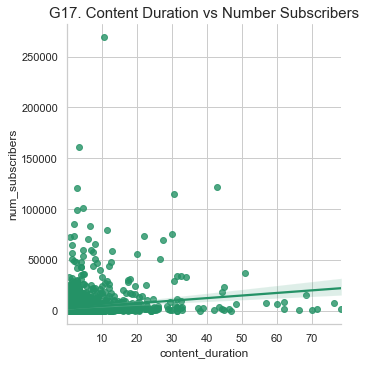

In [74]:
sns.set(style='whitegrid', palette='summer')
# plt.title('G17. Content Duration vs Number Subscribers', fontsize=15)
sns_plot = sns.lmplot(x='content_duration',y='num_subscribers',data=tab_eda9, palette='muted')
ax = plt.gca()
ax.set_title('G17. Content Duration vs Number Subscribers', fontsize=15)
# sns_plot.savefig("G17.png")
plt.show()

- Berdasarkan grafik G17, content_duration **tidak terlalu berpengaruh** terhadap jumlah subscribers

- Namun disini saya akan coba kelompokkan content duration dan melihat pada range berapa durasi konten dapat memperoleh jumlah subscribers yang maksimal

In [75]:
tab_eda9['duration_bin'] = pd.cut(tab_eda9['content_duration'], bins=[0, tab_eda9.content_duration.quantile(0.25), tab_eda9.content_duration.quantile(0.5), tab_eda9.content_duration.quantile(0.75), df['content_duration'].max()], labels=['Singkat', 'Cukup', 'Lama', 'Sangat Lama'])
tab_eda9.head(2)

,num_subscribers,num_reviews,num_lectures,content_duration,level,subject,price,duration_bin
116,307,8,5,0.13,All Levels,Business Finance,25,Singkat
448,605,19,4,0.32,All Levels,Business Finance,20,Singkat


In [76]:
tab_eda91 = pd.crosstab(index='Jumlah Data', columns=tab_eda9.duration_bin, values=tab_eda9.num_subscribers, aggfunc='count')
tab_eda91

duration_bin,Singkat,Cukup,Lama,Sangat Lama
row_0,,,,
Jumlah Data,933,926,957,861


In [77]:
tab_eda92 = pd.crosstab(index='Jumlah Subscriber', columns=tab_eda9.duration_bin, values=tab_eda9.num_subscribers, aggfunc='sum')
tab_eda92

duration_bin,Singkat,Cukup,Lama,Sangat Lama
row_0,,,,
Jumlah Subscriber,1797668,2558127,3028817,4374508


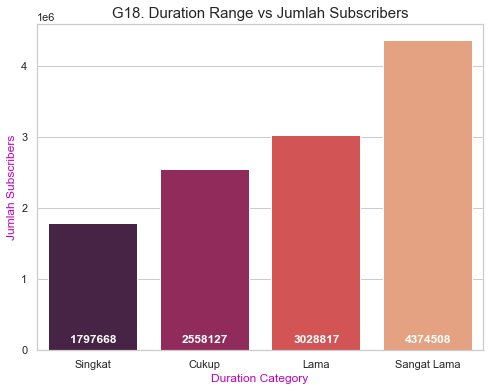

In [78]:
plt.figure(figsize=(8,6))
sns.barplot(x=tab_eda92.columns, y=tab_eda92.iloc[0], palette='rocket')
plt.xlabel('Duration Category', c='m', fontsize=12)
plt.ylabel('Jumlah Subscribers', c='m', fontsize=12)
for i in range(0,4):
    plt.text(i-0.2, 100000, tab_eda92.iloc[0][i], fontweight='bold', color='white')
plt.title('G18. Duration Range vs Jumlah Subscribers', fontsize=15)

plt.show()

- **Semakin lama content duration, jumlah subscribers semakin banyak**. Dan memperoleh jumlah subscribers maksimal pada durasi dg kategori sangat lama (4.5 - 78.5)

##### b5. Subscribers vs lecture

In [79]:
tab_eda10 = df1[['num_subscribers', 'num_lectures', 'subject']][(df1.content_duration>0)].sort_values(by='num_lectures')

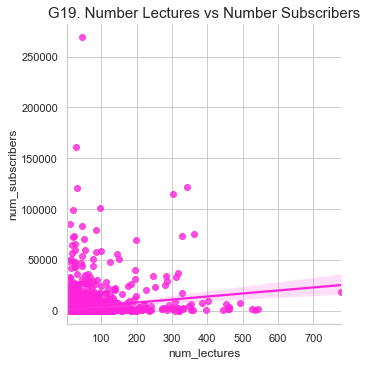

In [80]:
sns.set(style='whitegrid', palette='spring')
# plt.title('G17. Content Duration vs Number Subscribers', fontsize=15)
sns_plot = sns.lmplot(x='num_lectures',y='num_subscribers',data=tab_eda9,)
ax = plt.gca()
ax.set_title('G19. Number Lectures vs Number Subscribers', fontsize=15)
sns_plot.savefig("G19.png")
plt.show()

- Berdasarkan grafik G19, num_lecture **tidak begitu berpengaruh** terhadap jumlah subscribers

##### b6. Subscribers vs Subject

In [81]:
tab_eda11 = df1[['num_subscribers', 'subject']][(df1.content_duration>0)]
tab_eda11a = pd.crosstab(index=tab_eda11.subject, columns='Jumlah Subscriber', values=tab_eda11.num_subscribers, aggfunc='sum').sort_values(by='Jumlah Subscriber', ascending=False)
tab_eda11a

col_0,Jumlah Subscriber
subject,
Web Development,7980572
Business Finance,1868711
Graphic Design,1063148
Musical Instruments,846689


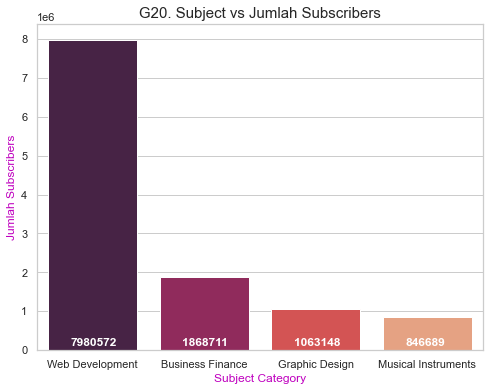

In [82]:
plt.figure(figsize=(8,6))
sns.barplot(x=tab_eda11a.index, y=tab_eda11a['Jumlah Subscriber'].iloc[:], palette='rocket')
plt.xlabel('Subject Category', c='m', fontsize=12)
plt.ylabel('Jumlah Subscribers', c='m', fontsize=12)
for i in range(0,4):
    plt.text(i-0.2, 100000, tab_eda11a['Jumlah Subscriber'].iloc[i], fontweight='bold', color='white')
plt.title('G20. Subject vs Jumlah Subscribers', fontsize=15)
plt.show()

- Subject **Web Development** ialah subject yang paling banyak diminati para subscriber untuk dibeli

##### b7. Subscribers vs Level

In [83]:
tab_eda12 = df1[['num_subscribers', 'level']][(df1.content_duration>0)]
tab_eda12a = pd.crosstab(index=tab_eda12.level, columns='Jumlah Subscriber', values=tab_eda12.num_subscribers, aggfunc='sum').sort_values(by='Jumlah Subscriber', ascending=False)

In [84]:
pd.crosstab(index='Jumlah Subscriber', columns=tab_eda12.level, values=tab_eda12.num_subscribers, aggfunc='count')

level,All Levels,Beginner Level,Expert Level,Intermediate Level
row_0,,,,
Jumlah Subscriber,1928,1270,58,421


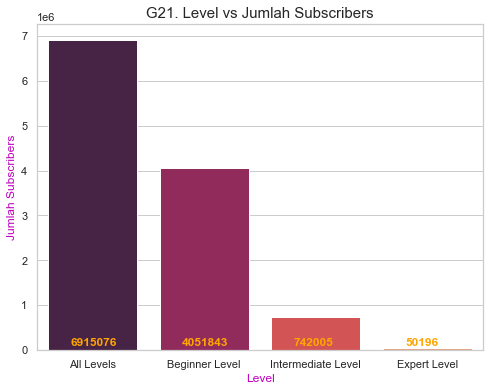

In [85]:
plt.figure(figsize=(8,6))
sns.barplot(x=tab_eda12a.index, y=tab_eda12a['Jumlah Subscriber'].iloc[:], palette='rocket')
plt.xlabel('Level', c='m', fontsize=12)
plt.ylabel('Jumlah Subscribers', c='m', fontsize=12)
for i in range(0,4):
    plt.text(i-0.2, 100000, tab_eda12a['Jumlah Subscriber'][i], fontweight='bold', color='orange')
plt.title('G21. Level vs Jumlah Subscribers', fontsize=15)

plt.show()

- Level course yang dapat mencapai subscriber maksimal secara keseluruhan ialah pada All Level

##### b8. Reviews vs Content_duration

In [86]:
tab_eda13 = tab_eda9.copy()
tab_eda13.head()

,num_subscribers,num_reviews,num_lectures,content_duration,level,subject,price,duration_bin
116,307,8,5,0.13,All Levels,Business Finance,25,Singkat
448,605,19,4,0.32,All Levels,Business Finance,20,Singkat
984,327,1,12,0.45,Beginner Level,Business Finance,20,Singkat
718,23,7,6,0.47,All Levels,Business Finance,20,Singkat
1937,1582,11,6,0.48,All Levels,Musical Instruments,20,Singkat


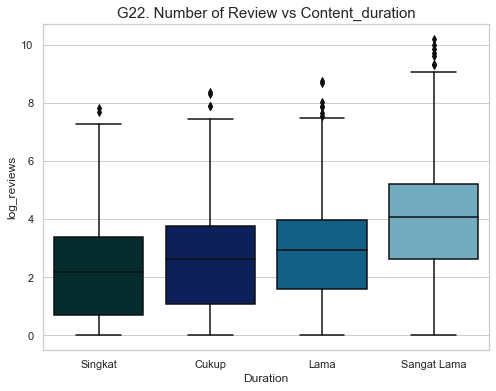

In [87]:
plt.figure(figsize=(8,6))
tab_eda13['log_reviews'] = np.log(tab_eda13.num_reviews)
sns.boxplot(x='duration_bin', y='log_reviews', data=tab_eda13, palette='ocean')
plt.title('G22. Number of Review vs Content_duration', fontsize=15)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('log_reviews', fontsize=12)

plt.show()

- Semakin lama content_duration, semakin banyak reviewers

In [88]:
tab_eda131 = pd.crosstab(index=tab_eda13.duration_bin, columns='Jumlah Review', values=tab_eda13.num_reviews, aggfunc='sum').sort_values(by='Jumlah Review', ascending=True)

In [89]:
tab_eda131

col_0,Jumlah Review
duration_bin,
Singkat,50621
Cukup,63225
Lama,90332
Sangat Lama,370543


- Semakin lama durasi konten, maka jumlah reviews akan semakin banyak. Dan dapat mencapai num_reviews terbanyak pada durasi 'Sangat Lama'.

##### b9. Reviews vs num_lectures

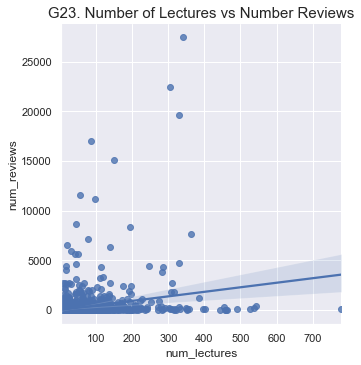

In [90]:
tab_eda14 = df1[['num_lectures','num_reviews']][(df1.num_subscribers>0) & (df1.num_reviews>0)].sort_values(by='num_lectures')

sns.set(color_codes='b', palette='deep')
sns.lmplot(x='num_lectures',y='num_reviews', data=tab_eda14, palette='rainbow')
plt.title('G23. Number of Lectures vs Number Reviews', fontsize=15)
plt.xlabel('num_lectures', fontsize=12)
plt.ylabel('num_reviews', fontsize=12)

plt.show()

- Pengaruh jumlah lecture terhadap jumlah review tidak begitu kuat

##### b10. Content_duration vs num_lectures

In [91]:
tab_eda15 = tab_eda9[['num_lectures', 'content_duration', 'duration_bin','price']].sort_values(by='content_duration')

<Figure size 576x504 with 0 Axes>

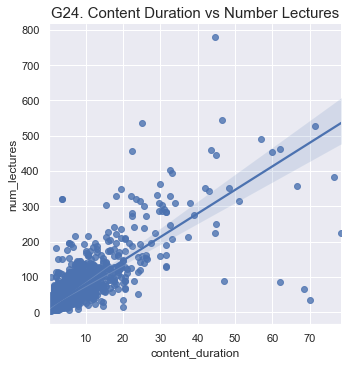

In [92]:
plt.figure(figsize=(8,7))
sns.lmplot(x='content_duration', y='num_lectures', data=tab_eda15, palette='ocean')
plt.title('G24. Content Duration vs Number Lectures', fontsize=15)
plt.xlabel('content_duration', fontsize=12)
plt.ylabel('num_lectures', fontsize=12)
plt.savefig('G24.png')
plt.show()

- Jumlah lecture dan durasi konten memiliki korelasi positif yang kuat

In [93]:
df1[df1.num_lectures==0]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,year_p,month_p,date_p
892,627332,Mutual Funds for Investors in Retirement Accounts,https://www.udemy.com/mutual-funds-for-investors-in-retirement-accounts/,True,20,0,0,0,All Levels,0.0,Business Finance,2015,12,17


![Ini image](https://i.ibb.co/PwRKT8s/IMG-course-0-duration.png)

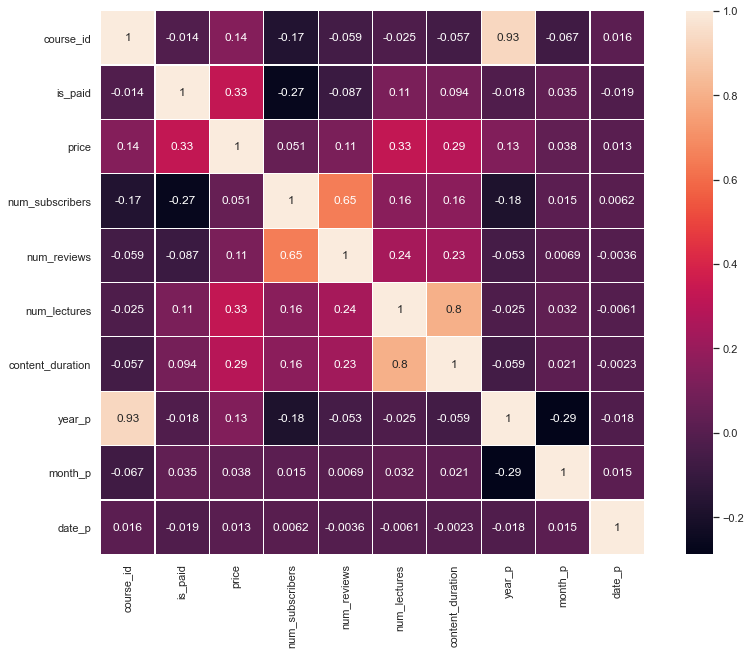

In [94]:
plt.figure(figsize=(15, 10))

sns.heatmap(df1.corr(), annot=True, square=True, linewidths=0.25)
plt.show()

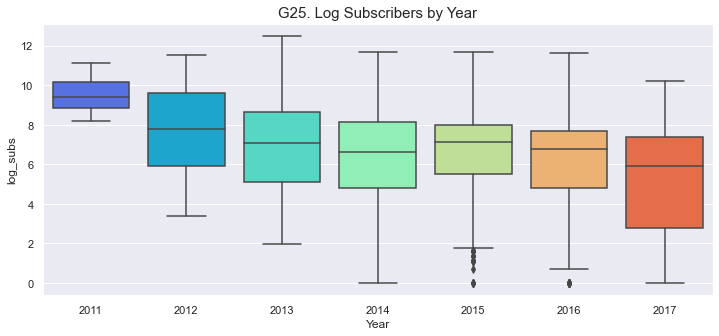

In [95]:
plt.figure(figsize=(12,5))
mama = df1.copy()
mama['log_subs'] = np.log(mama.num_subscribers)
sns.boxplot(x='year_p', y='log_subs', data=mama, palette='rainbow')
plt.title('G25. Log Subscribers by Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('log_subs', fontsize=12)
plt.show()

- Semakin bertambahnya tahun perilisan, semakin menurun jumlah subscriber

##### Kesimpulan Analisis

- Jumlah review sangat kuat dalam mempengaruhi perolehan jumlah subscribers.
- Tipe lisensi gratis sangat mudah untuk memperoleh banyak subscriber, sedangkan tipe lisensi berbayar dapat dimaksimalkan untuk memperoleh subscribers dengan membuat pengelompokkan harga. Berdasarkan data, range harga yang dapat memaksimalkan jumlah subscriber ialah pada range harga 75-200 USD
- Content duration dan Jumlah lecture memiliki pengaruh yang kecil terhadap jumlah subscribers namun lebih besar pengaruhnya terhadap jumlah review
- Subject yang paling banyak diminati secara keseluruhan ialah Web Development dan Business Finance, sedangkan pada range harga 75-200 ialah Web Development
- Level course yang cukup banyak mendapatkan jumlah subscribers yang tinggi ialah All Levels